# Hepatitis EDA (19-PDS-004)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:/Users/rafim/Downloads/hepatitis_csv.csv",sep=",")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [3]:
df1.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
df1.shape

(155, 20)

# Working with data types for further analysis

In [5]:
df1['steroid'] = pd.to_numeric(df1['steroid'],errors='coerce')
df1['fatigue'] = pd.to_numeric(df1['fatigue'],errors='coerce')
df1['malaise'] = pd.to_numeric(df1['malaise'],errors='coerce')
df1['anorexia'] = pd.to_numeric(df1['anorexia'],errors='coerce')
df1['liver_big'] = pd.to_numeric(df1['liver_big'],errors='coerce')
df1['liver_firm'] = pd.to_numeric(df1['liver_firm'],errors='coerce')
df1['spleen_palpable'] = pd.to_numeric(df1['spleen_palpable'],errors='coerce')
df1['spiders'] = pd.to_numeric(df1['spiders'],errors='coerce')
df1['ascites'] = pd.to_numeric(df1['ascites'],errors='coerce')
df1['varices'] = pd.to_numeric(df1['varices'],errors='coerce')
df1['bilirubin'] = pd.to_numeric(df1['bilirubin'],errors='coerce')
df1['alk_phosphate'] = pd.to_numeric(df1['alk_phosphate'],errors='coerce')
df1['sgot'] = pd.to_numeric(df1['sgot'],errors='coerce')
df1['albumin'] = pd.to_numeric(df1['albumin'],errors='coerce')
df1['protime'] = pd.to_numeric(df1['protime'],errors='coerce')

In [6]:
df1["class"].replace({False: 0, True: 1},inplace=True)
df1["sex"].replace({False: 0, True: 1},inplace=True)
df1["age"].replace({False: 0, True: 1},inplace=True)
df1["steroid"].replace({False: 0, True: 1},inplace=True)
df1["antivirals"].replace({False: 0, True: 1},inplace=True)
df1["fatigue"].replace({False: 0, True: 1},inplace=True)
df1["malaise"].replace({False: 0, True: 1},inplace=True)
df1["anorexia"].replace({False: 0, True: 1},inplace=True)
df1["liver_big"].replace({False: 0, True: 1},inplace=True)
df1["liver_firm"].replace({False: 0, True: 1},inplace=True)
df1["spleen_palpable"].replace({False: 0, True: 1},inplace=True)
df1["spiders"].replace({False: 0, True: 1},inplace=True)
df1["ascites"].replace({False: 0, True: 1},inplace=True)
df1["varices"].replace({False: 0, True: 1},inplace=True)
df1["histology"].replace({False: 0, True: 1},inplace=True)

In [8]:
df1.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0,live
1,50,female,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0,live
2,78,female,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0,live
3,31,female,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0,live
4,34,female,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0,live


In [9]:
df1.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

# Numerical values changed according to the median values

In [10]:
med1=df1['bilirubin'].median()
med2=df1['alk_phosphate'].median()
med3=df1['sgot'].median()
med4=df1['albumin'].median()
med5=df1['protime'].median()

df1['bilirubin'].replace(np.nan,med1,inplace=True)
df1['alk_phosphate'].replace(np.nan,med2,inplace=True)
df1['sgot'].replace(np.nan,med3,inplace=True)
df1['albumin'].replace(np.nan,med4,inplace=True)
df1['protime'].replace(np.nan,med5,inplace=True)

# Categorical values changed according to mode values

In [11]:
mode1=df1['steroid'].mode().values[0]
mode2=df1['fatigue'].mode().values[0]
mode3=df1['malaise'].mode().values[0]
mode4=df1['anorexia'].mode().values[0]
mode5=df1['liver_big'].mode().values[0]
mode6=df1['liver_firm'].mode().values[0]
mode7=df1['spleen_palpable'].mode().values[0]
mode8=df1['spiders'].mode().values[0]
mode9=df1['ascites'].mode().values[0]
mode10=df1['varices'].mode().values[0]

df1['steroid']=df1['steroid'].replace(np.nan,mode1)
df1['fatigue']=df1['fatigue'].replace(np.nan,mode2)
df1['malaise']=df1['malaise'].replace(np.nan,mode3)
df1['anorexia']=df1['anorexia'].replace(np.nan,mode4)
df1['liver_big']=df1['liver_big'].replace(np.nan,mode5)
df1['liver_firm']=df1['liver_firm'].replace(np.nan,mode6)
df1['spleen_palpable']=df1['spleen_palpable'].replace(np.nan,mode7)
df1['spiders']=df1['spiders'].replace(np.nan,mode8)
df1['ascites']=df1['ascites'].replace(np.nan,mode9)
df1['varices']=df1['varices'].replace(np.nan,mode10)

In [12]:
df1.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [13]:
df1.describe()

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,0.509677,0.154839,0.651613,0.393548,0.206452,0.838710,0.387097,0.193548,0.329032,0.129032,0.116129,1.410968,101.522581,85.174194,3.836129,61.483871,0.451613
std,12.565878,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.191178,47.082042,88.590122,0.619267,17.198745,0.499266
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,78.000000,32.500000,3.500000,57.000000,0.000000
50%,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,58.000000,4.000000,61.000000,0.000000
75%,50.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,119.500000,99.000000,4.200000,65.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.000000,648.000000,6.400000,100.000000,1.000000


# EDA with percentages

In [14]:
df1['female'] = df1.sex.map(lambda x : 1 if x == 'female' else 0)

In [15]:
Sex= pd.Series(np.where(df1.female==1,'Female','Male'))
Sex

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
150    Female
151    Female
152    Female
153      Male
154    Female
Length: 155, dtype: object

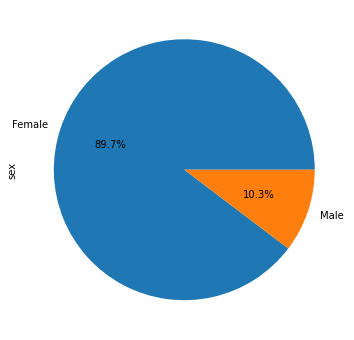

In [16]:
plt.figure(figsize=(8,6))
a=pd.Series(df1["sex"])
a.value_counts().plot(kind="pie",labels={"Male","Female"},autopct='%1.1f%%')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

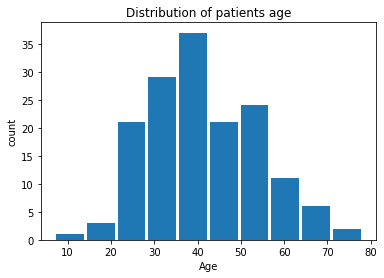

In [26]:
plt.hist(df1['age'], bins=None, rwidth=0.9 )
plt.title('Distribution of patients age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show

<AxesSubplot:xlabel='age'>

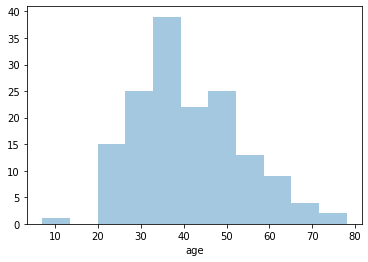

In [28]:
sns.distplot(df1["age"],kde=False)

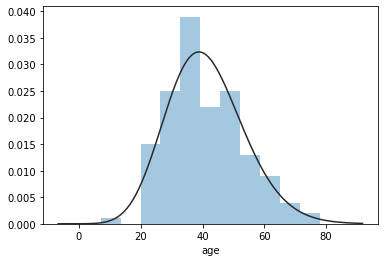

In [69]:
from scipy import stats
sns.distplot(df1["age"], kde=False, fit=stats.gamma);

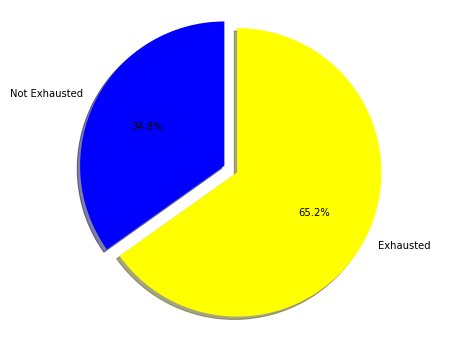

In [41]:
no =len(df1[df1['fatigue'] == 0])
yes = len(df1[df1['fatigue']== 1])
plt.figure(figsize=(8,6))
labels = 'Not Exhausted','Exhausted'
sizes = [no,yes]
colors = ['blue', 'yellow']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

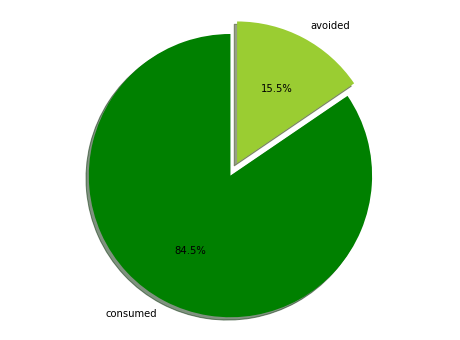

In [44]:
no =len(df1[df1['antivirals'] == 0])
yes = len(df1[df1['antivirals']== 1])
plt.figure(figsize=(8,6))
labels = 'consumed','avoided'
sizes = [no,yes]
colors = ['green', 'yellowgreen']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

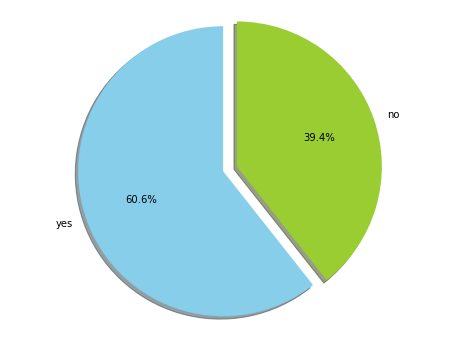

In [46]:
no =len(df1[df1['malaise'] == 0])
yes = len(df1[df1['malaise']== 1])
plt.figure(figsize=(8,6))
labels = 'yes','no'
sizes = [no,yes]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

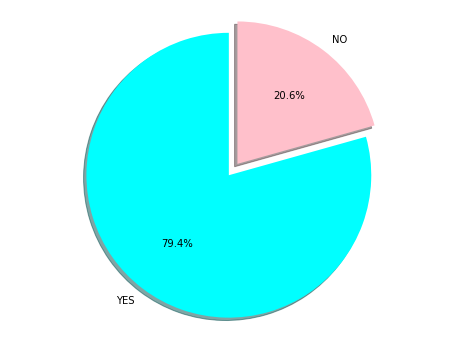

In [48]:
no =len(df1[df1['anorexia'] == 0])
yes = len(df1[df1['anorexia']== 1])
plt.figure(figsize=(8,6))
labels = 'YES','NO'
sizes = [no,yes]
colors = ['cyan', 'pink']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

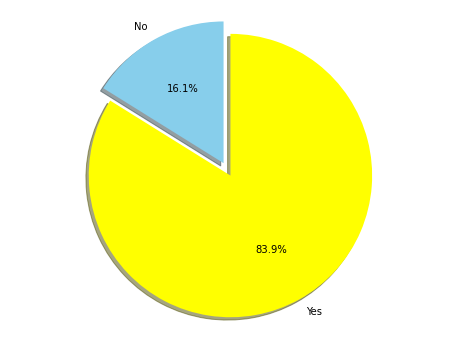

In [51]:
no =len(df1[df1['liver_big'] == 0])
yes = len(df1[df1['liver_big']== 1])
plt.figure(figsize=(8,6))
labels = 'No','Yes'
sizes = [no,yes]
colors = ['skyblue', 'yellow']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

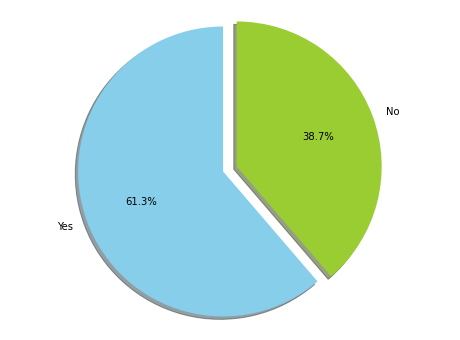

In [53]:
no =len(df1[df1['liver_firm'] == 0])
yes = len(df1[df1['liver_firm']== 1])
plt.figure(figsize=(8,6))
labels = 'Yes','No'
sizes = [no,yes]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

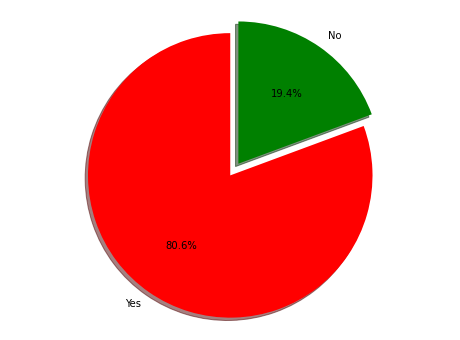

In [55]:
no =len(df1[df1['spleen_palpable'] == 0])
yes = len(df1[df1['spleen_palpable']== 1])
plt.figure(figsize=(8,6))
labels = 'Yes','No'
sizes = [no,yes]
colors = ['red', 'green']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

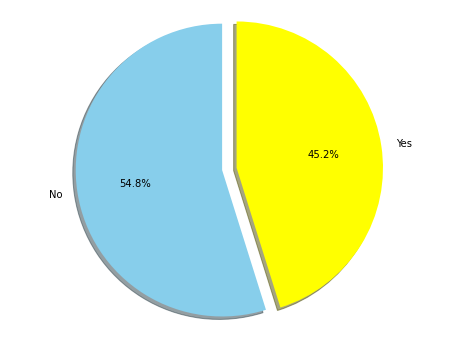

In [60]:
no =len(df1[df1['histology'] == 0])
yes = len(df1[df1['histology']== 1])
plt.figure(figsize=(8,6))
labels = 'No','Yes'
sizes = [no,yes]
colors = ['skyblue', 'yellow']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')
plt.show()

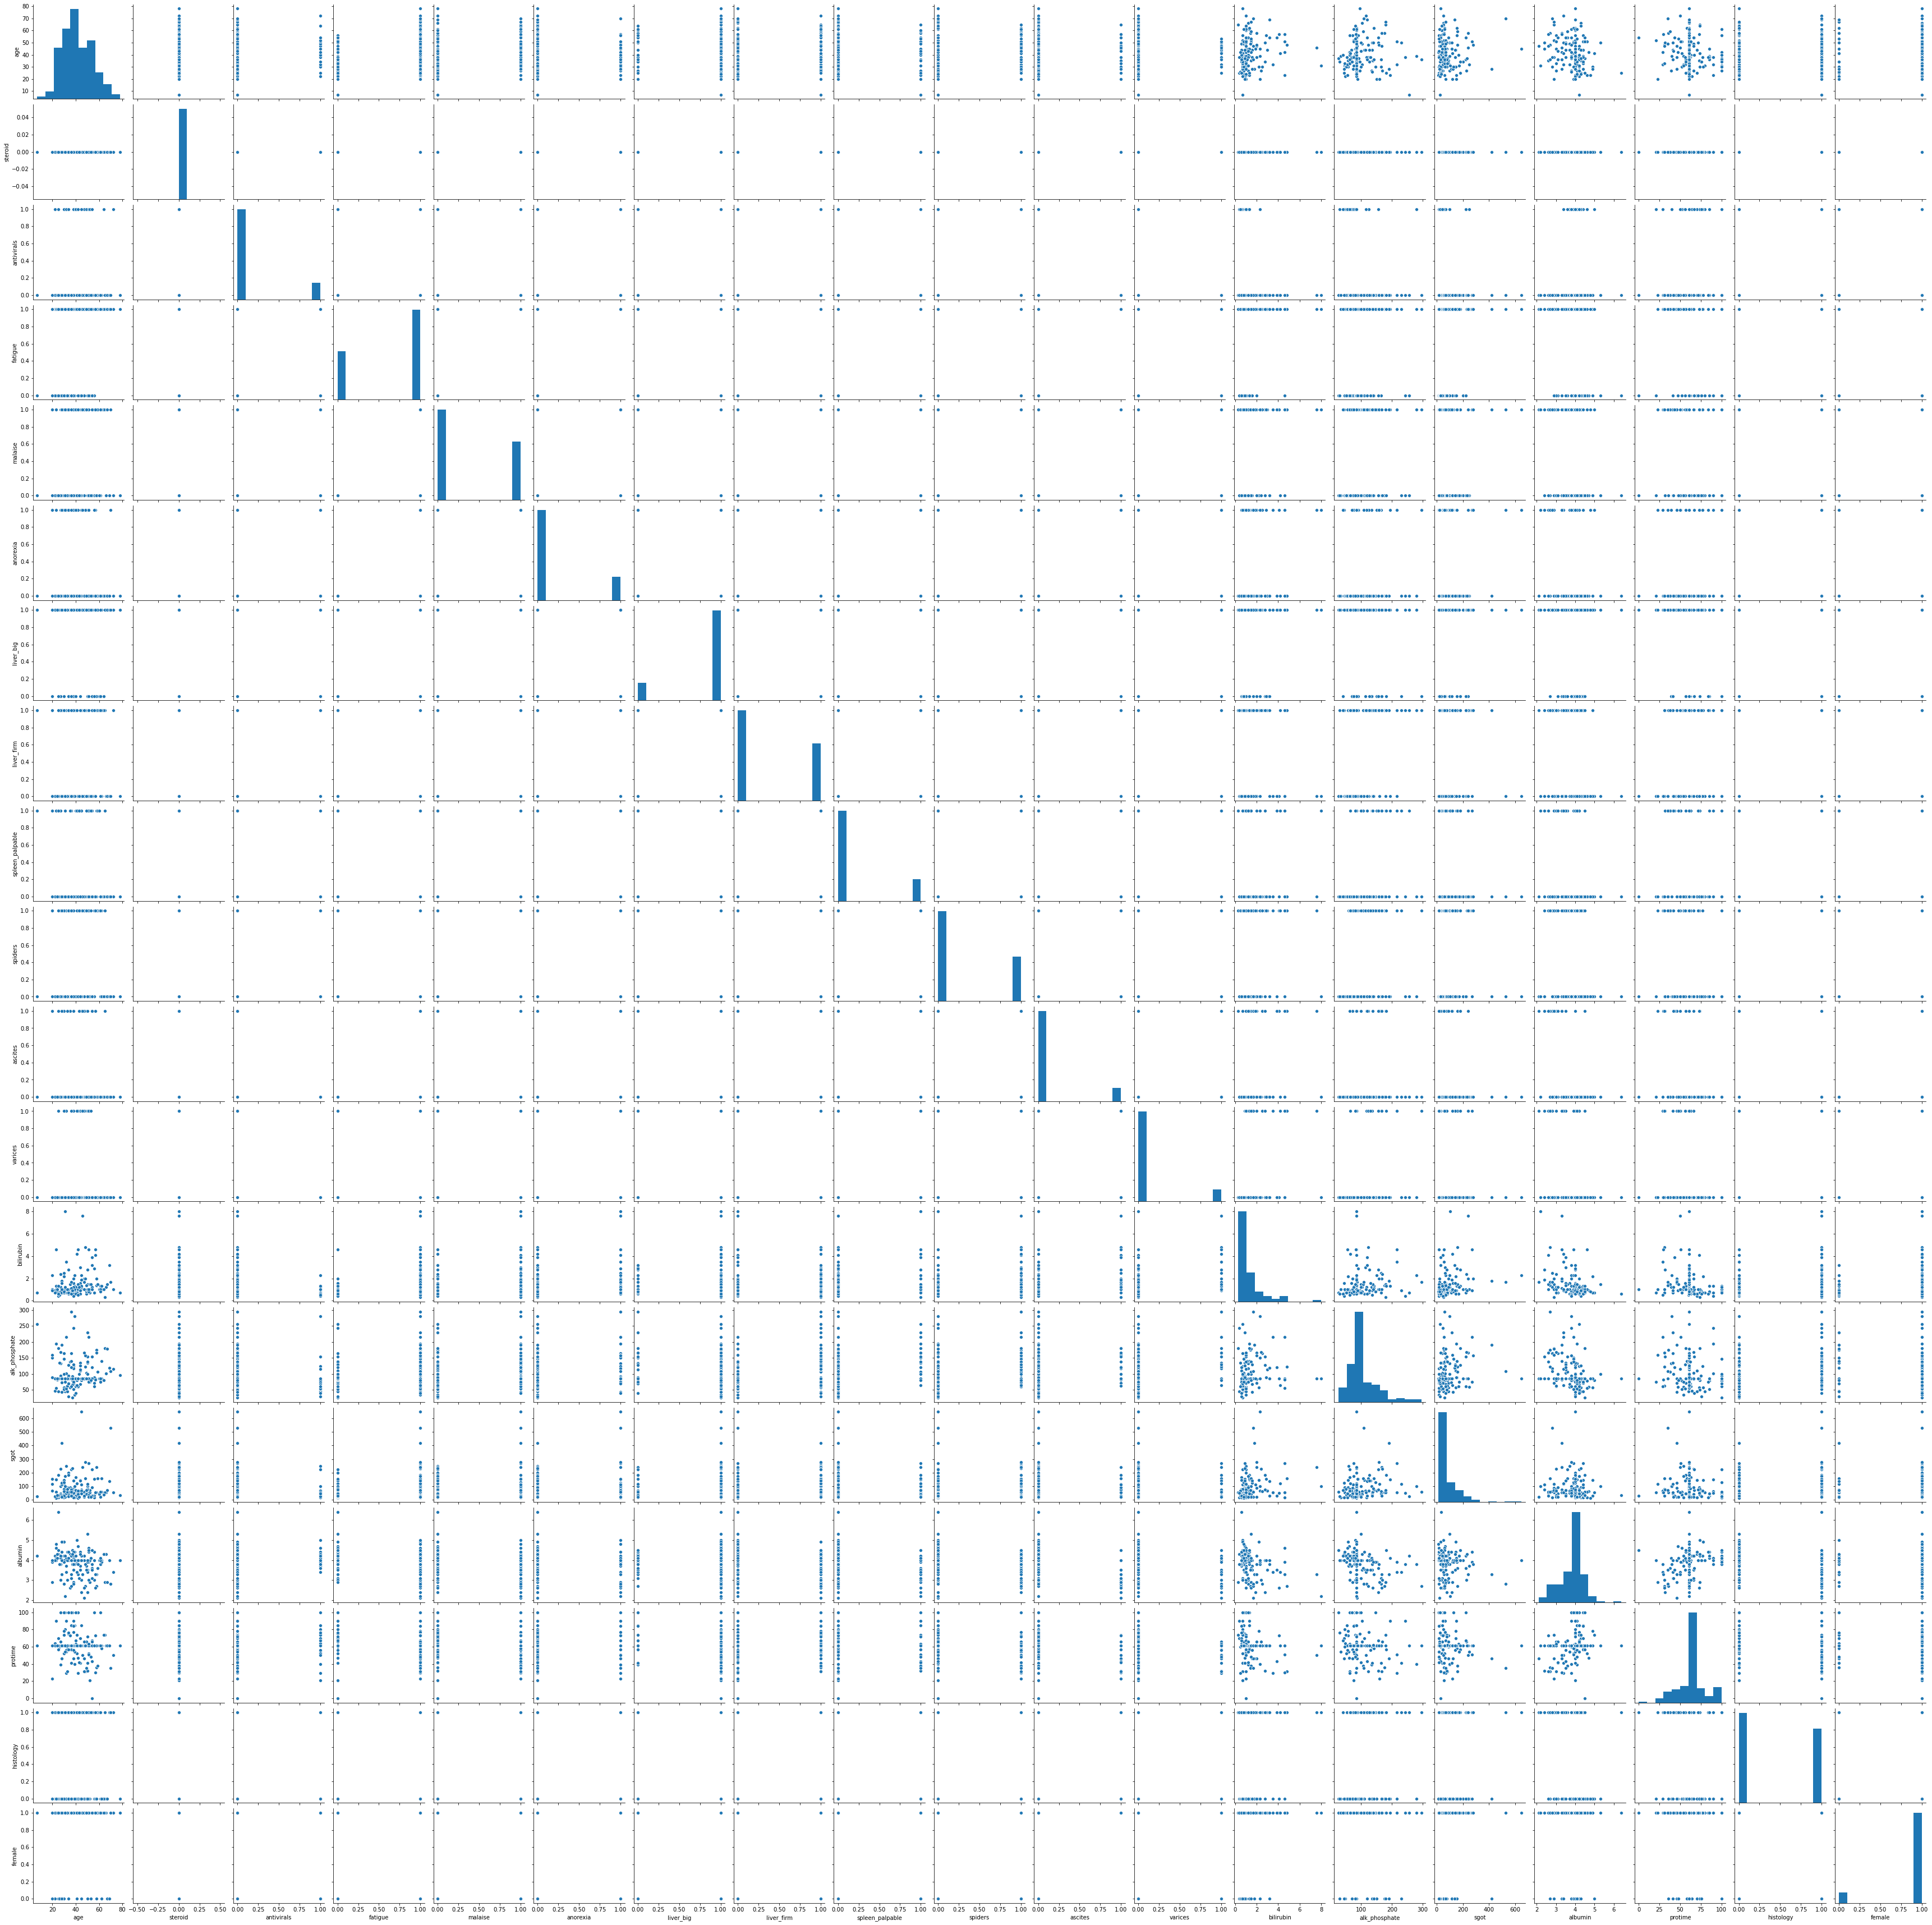

In [67]:
sns.pairplot(df1)